# 機械学習をPythonで実践する-8　～ クラスタリング ～
参考:  
* [Udemy「【後編】米国データサイエンティストがやさしく教える機械学習超入門【Pythonで実践】」](https://www.udemy.com/share/107lWS3@Hm95QyBI9u1l7-j2BXayzVBUamljeFWkW7tVhZpO2RkpU6H6CA83o50IQi3qKBFK/)

In [140]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
# import statsmodels.api as sma
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss, confusion_matrix,ConfusionMatrixDisplay, \
accuracy_score, precision_score, recall_score,precision_recall_curve,f1_score,roc_curve,auc
from scipy.stats import hmean
from sklearn.decomposition import PCA
import plotly.express as px
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_openml
import time
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ k-means
sklearn.cluster.KMeansクラスを使ってk-meansによるクラスタリングを行える。  
1. KMeans(n_clusters)でインスタンス生成
    * n_clusters引数にはクラスタの数を指定
    
2. .fit(X)で学習(クラスタリング実施)
    * 目的変数はないため、特徴量Xだけでよい。Xは標準化することに注意
    * .predict(X)で各データのクラスタリングの結果を参照
    * .score(X)で損失を計算

In [15]:
# irisデータセット読み込み
df = sns.load_dataset('iris')

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


irisデータセットは正解ラベルが明らか(species)だが、ここではクラスタリングの結果と比較するために用いる。

In [17]:
# 特徴量を定義
X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# 標準化
X_scaled = StandardScaler().fit_transform(X)

In [26]:
# k-means
kmeans = KMeans(n_clusters=3, random_state=0)
# .fit(X)でクラスタリング実施
kmeans.fit(X_scaled)



KMeans(n_clusters=3, random_state=0)

In [29]:
# .predict(X)で結果を取得。回帰や分類のようにテストデータではなく学習データをpredictの引数に入れる。
# これはクラスタリングでは学習データのクラスタリング結果にも興味があるため。テストデータと学習データを分ける必要はない。
labels = kmeans.predict(X_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 下記のようにfit,predictを同時にできる
# kmeans.fit_predict(X)

## ○ k-meansの結果を描画

In [79]:
# 特徴量データ(標準化前)とクラスタリング結果を結合
clustering_result = X.copy()
clustering_result['labels'] = labels
# 下記の書き方でもOK.一度DFにする必要はあまりないかも。
# pd.concat(X, pd.DataFrame(labels, columns=['kmean_result']),axis=1)
clustering_result

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


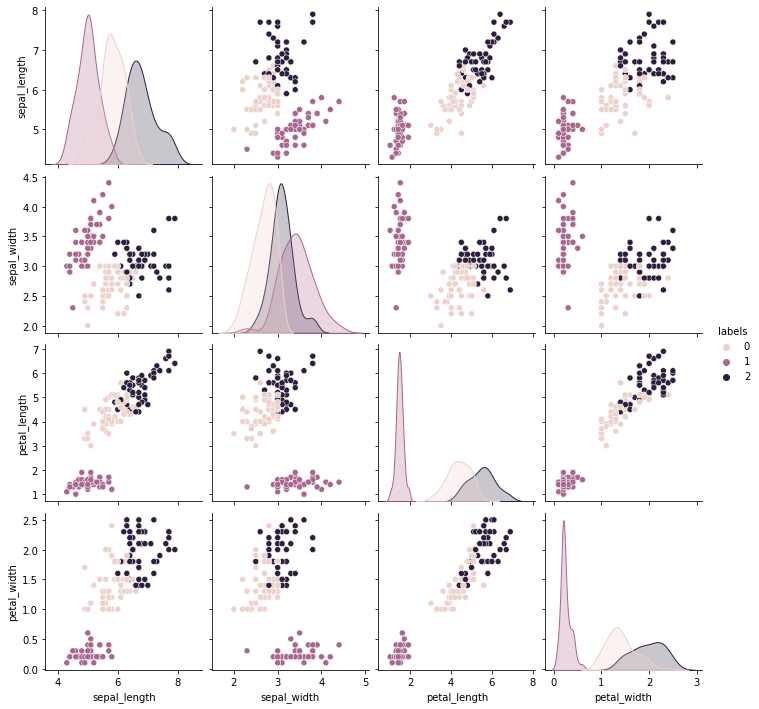

In [80]:
sns.pairplot(clustering_result, hue='labels')

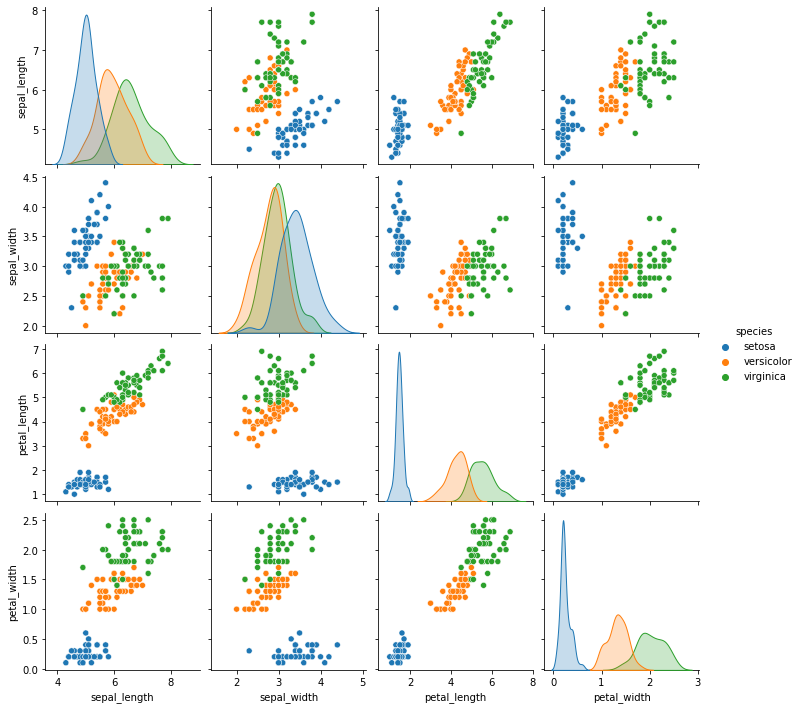

In [82]:
# 正解ラベルを表示
sns.pairplot(df,hue='species')

クラスタリングの結果はそこそこ正解ラベルと合っていそう。  
ただし、当然クラスタリングの結果だけ見てもどのラベルがどの正解ラベルなのかはわからない。  
実際の業務では正解ラベルはわからない状態でクラスタリングを行うので、このような比較はできない。  

In [83]:
# k=3のScore（≒損失）を見てみる。Scoreは高いほど良いとしているため、負から０までの値をとる。
# 実際の損失は距離の平方和なので正の値
kmeans.score(X_scaled)

-139.8204963597497

In [84]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [94]:
# K=1～10の場合のスコアを算出
k_list = list(range(1,10))
kmeans_scores = [-KMeans(n_clusters=i, random_state=0).fit(X_scaled).score(X_scaled) for i in k_list]

In [95]:
kmeans_scores

[599.9999999999999,
 222.36170496502297,
 139.8204963597497,
 114.35407164049771,
 90.92751382392048,
 80.02218752722615,
 71.03343108154414,
 62.514305803355526,
 54.09786462356242]

Text(0, 0.5, 'Loss')

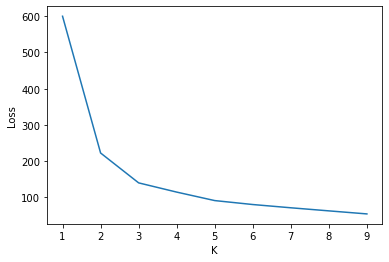

In [96]:
# kと損失をプロット
plt.plot(k_list, kmeans_scores)
plt.xlabel('K')
plt.ylabel('Loss')

Elbow method的にはK=2または3あたりが良さそうとわかる。

## ○ 階層クラスタリング
* scipy.cluster.hierarchy.linkage
    * linkage(X, method)でクラスタリング実施
        * method引数には’single’, ‘average’, ‘complete’, ‘centroid’, ‘ward’等の距離の定義法を指定
    * dendrogramを構成する情報(クラスタリング過程)をNumPy Arrayで返す
        * 戻り値：クラスタ1のindex, クラスタ2のindex, 距離, データの数(クラスタ1,2の合算)
            * 戻り値のindex <データ数だった場合、学習データのindex(クラスタ=データ)が返ってきている
            * 戻り値のindex>=データ数:linkageの戻り値のindex（融合後のクラスタのindex）が返ってきている。  


* scipy.cluster.hierarchy.dendrogram
    * dendrogram(Z)でdendrogramを描画。Zにはlinkageの戻り値を入れる
    * truncate_mode引数およびp引数で任意の高さでdendrogramを切る
        * truncate_mode=‘lastp’, p=クラスタ数：　指定したp個のクラスタになるようにdendrogram を切る
        * truncate_model=‘level’, p=段数： p段になるようにdendrogramを切る

In [104]:
# irisデータでクラスタリング実施
Z =  linkage(X_scaled, method='ward')

In [105]:
# クラスタリング結果を確認
Z[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

1行目Z[0]はインデックス101のクラスタと142のクラスタの距離は０でデータ数2のクラスタになったことを示している。  
（同じデータがあった）  
データ数が2の行はデータ同士の融合である。  
ちなみにZ[0] は融合後のクラスタのindex=150となる。(index=148まではX_scaledを指す)

In [110]:
len(X_scaled)

150

In [109]:
Z[100]

array([205.        , 226.        ,   0.71431234,   6.        ])

indexがデータ数(150)よりも大きいので、融合後のクラスタ同士の結合であることがわかる。

In [113]:
Z[226-len(X_scaled)]

array([102.        , 184.        ,   0.47669061,   3.        ])

Z[0]はindex=150であるから、任意の融合後のクラスタのindexから元データ数を引くことでそのクラスタが融合された時の情報が分かる。  
上記より、index=226のクラスタはindex=102,index=184のクラスタの融合の結果であることが分かる。

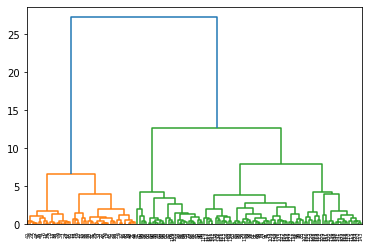

In [116]:
# dendrogramを描画。素で表示させると、見づらいので変数に格納しておく
d = dendrogram(Z)

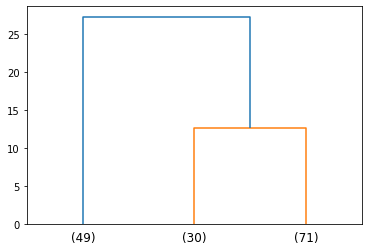

In [117]:
# 3クラスタに分ける
d = dendrogram(Z, truncate_mode='lastp', p=3)

()内はクラスタごとのデータ数。

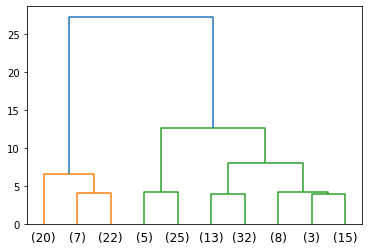

In [118]:
# 10クラスタに分ける
d = dendrogram(Z, truncate_mode='lastp', p=10)

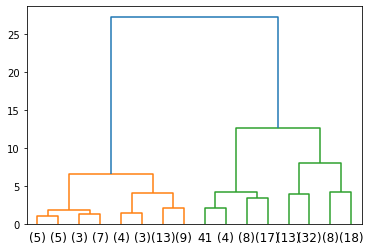

In [120]:
# ３段になるようにdendrogramを切る。ここでの段は上から数えたときの角の数。一番上位の角は数えない。
d = dendrogram(Z, truncate_mode='level', p=3)

## ○ 階層クラスタリングの結果を描画

scipy.cluster.hierarchy.fclusterで階層クラスタリング結果のラベル付けを行う。
* Z引数: linkage関数の戻り値を指定する。
* criterion引数: どの段階のクラスタ分けを使うか指定
    * ‘maxclust’: t引数に指定したクラスタ数でラベルづけをする
* t引数: criterion引数によって異なる値を指定する。criterion=maxclustの場合、分類したいクラスタ数を指定。

In [129]:
# ラベル付け。dendrogram(Z, truncate_mode='lastp', p=3)の場合の各クラスタ内データをラベル付けしていることに相当する。
fcluster(Z,criterion='maxclust', t=3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [131]:
# 元のデータにクラスタリング結果をラベル付け
linkage_result = X.copy()
linkage_result['labels'] = fcluster(Z,criterion='maxclust', t=3)
linkage_result.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


少しミスってるのが見受けられる。

In [ ]:
# pairplotを並べて表示するために一旦画像に保存する。seabornのプロットをそのまま複数表示することはできないようなので、一旦画像にする必要があるぽい。
pairplot_img1 = sns.pairplot(linkage_result, hue='labels')
pairplot_img1.savefig('./others/pairplot_img1.png')
pairplot_img2 = sns.pairplot(df, hue='species')
pairplot_img2.savefig('./others/pairplot_img2.png')

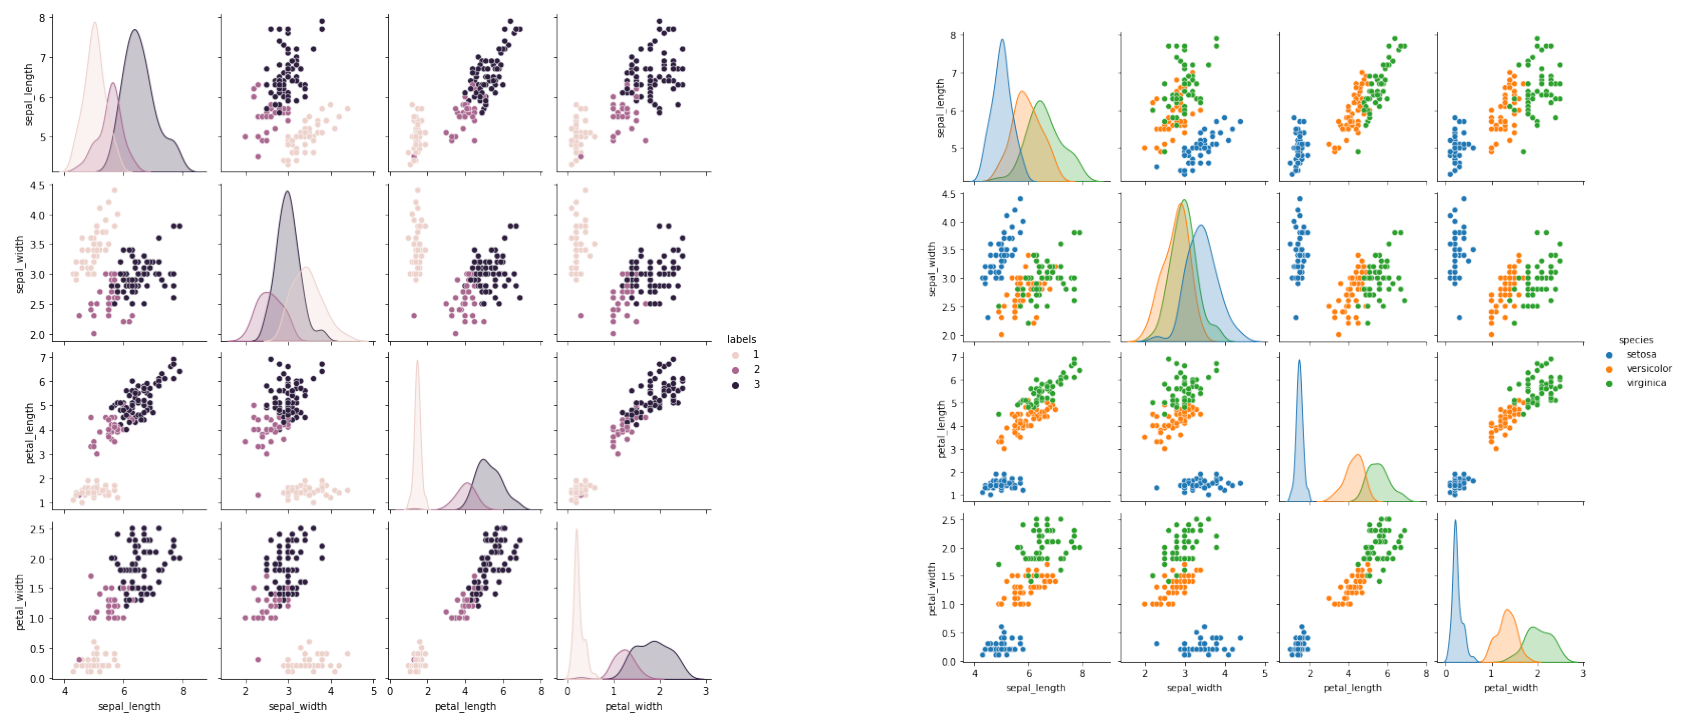

In [157]:
# 並べて画像を表示する
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
img1 = plt.imread('./others/pairplot_img1.png')
img2 = plt.imread('./others/pairplot_img2.png')

ax1.axis('off')
ax2.axis('off')
ax1.imshow(img1)
ax2.imshow(img2)

多少ミスが見られる。（実務では正解ラベルはわからないが）